In [94]:
import pandas as pd
import json
import seaborn as sns
import matplotlib as plt

In [95]:
!pip install anytree
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
!pip install graphviz
import graphviz
from anytree.dotexport import RenderTreeGraph
from IPython.display import display
from PIL import Image

In [96]:
cat = pd.read_json('categories.json') 
cat.head(5)

,id,name,path,subCategories
0,abcat0010000,Gift Ideas,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}]","[{'id': 'pcmcat140000050035', 'name': 'Capturi..."
1,abcat0020001,Learning Toys,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
2,abcat0020002,DVD Games,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
3,abcat0020004,Unique Gifts,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
4,abcat0100000,TV & Home Theater,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","[{'id': 'abcat0101000', 'name': 'TVs'}, {'id':..."


In [97]:
cat['path'][2]

[{'id': 'abcat0010000', 'name': 'Gift Ideas'},
 {'id': 'abcat0014000', 'name': 'Kids'},
 {'id': 'abcat0020000', 'name': 'Toys'},
 {'id': 'abcat0020002', 'name': 'DVD Games'}]

In [98]:
print(len(cat['path'][1]))
print(type(cat['path'][1]))
cat['path'][1]

4
<class 'list'>


[{'id': 'abcat0010000', 'name': 'Gift Ideas'},
 {'id': 'abcat0014000', 'name': 'Kids'},
 {'id': 'abcat0020000', 'name': 'Toys'},
 {'id': 'abcat0020001', 'name': 'Learning Toys'}]

In [99]:
cat['path'][1][1]['name']

'Kids'

### TREES BY PATHS


Row: 0Gift Ideas


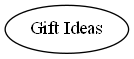


Row: 1Gift Ideas
Row: 1└── Kids
Row: 1    └── Toys
Row: 1        └── Learning Toys


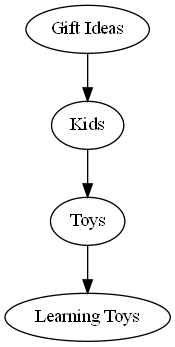


Row: 2Gift Ideas
Row: 2└── Kids
Row: 2    └── Toys
Row: 2        └── DVD Games


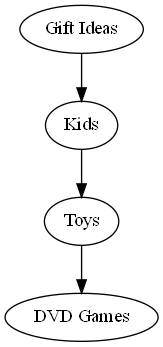


Row: 3Gift Ideas
Row: 3└── Unique Gifts


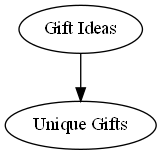


Row: 4TV & Home Theater


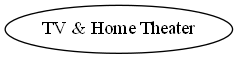

In [100]:

#To apply the entire df=   
#for row in range(len(cat)):

#Showing the first 5 path

for row in range(5):
    father = Node(cat['path'][row][0]['name'])
    
    #number of subcats
    for i in range(len(cat['path'][row])):
        if i == 1:
            child_1 = Node(cat['path'][row][i]['name'], parent= father)
            child = child_1
        else:
            
            child = Node(cat['path'][row][i]['name'], parent=child)
    print("")
    
    #printing de path with the lines
    for pre, fill, node in RenderTree(father):
        
        print("Row: %s%s%s" % (row,pre, node.name))
        
    #printing the image
    image = "last%s.png"% (row)
    DotExporter(father).to_picture(image)
    path=image
    display(Image.open(path))

### TREES BY FATHERS
#### COMING SOON